In [8]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

## basic level boxplot

In [9]:
# Filter for Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Remove rows where 'salary_year_avg' is NaN
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

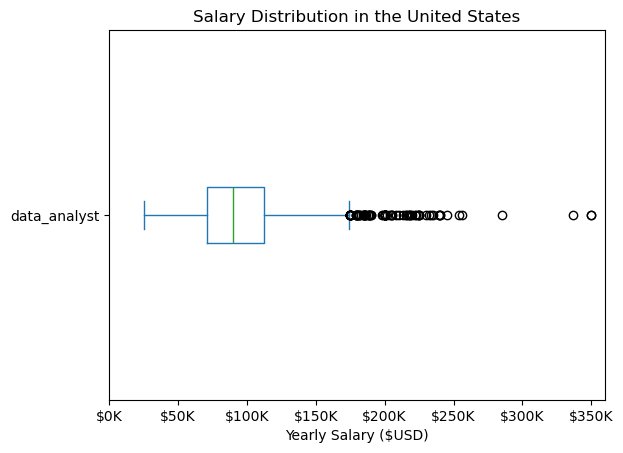

In [10]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False, label='data_analyst')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 360000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

C:\Users\go\AppData\Local\Temp\ipykernel_6216\3004491105.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_DA_US['salary_year_avg'], vert=False, labels=['data_analyst'])


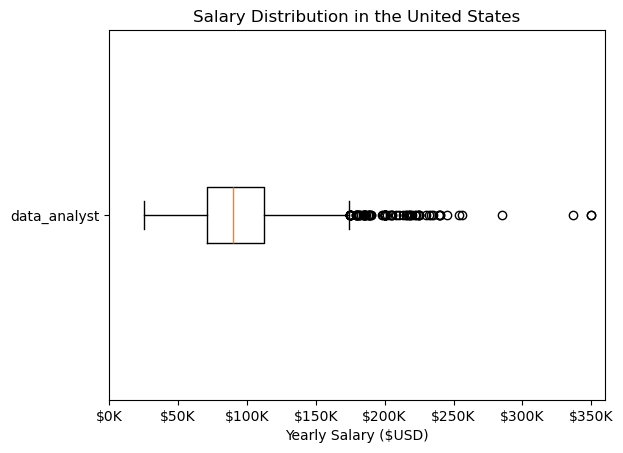

In [11]:
plt.boxplot(df_DA_US['salary_year_avg'], vert=False, labels=['data_analyst'])
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 360000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

## advanced level boxplot
plt.boxplot(`job_list`, lables = `job_titles`, vert = False)

C:\Users\go\AppData\Local\Temp\ipykernel_6216\4022703505.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


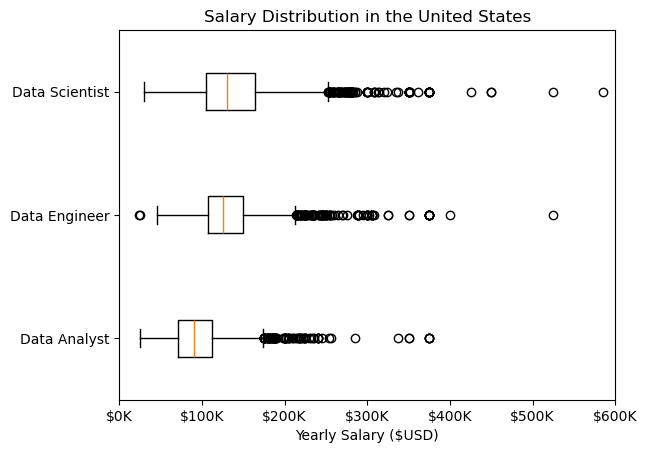

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64]

In [12]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job titles
df_US = df[ (df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] # compare that cell with the last one to understand the difference
            for job_title in job_titles                                    # where job_title_short equals that job_title, and collect them into a list
            ]

#df_US[df_US['job_title_short'] == job_title]
#This uses the mask to filter the DataFrame.
#Only the rows where the mask is True are kept.
#Result: a smaller DataFrame with only rows of that job title.

#['salary_year_avg']
#After filtering, we only want the salary_year_avg column.
#This gives us a Pandas Series (a 1D list-like object) containing just the salaries for that job.

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca() # get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()
job_list

## histogram and boxplot analysis level

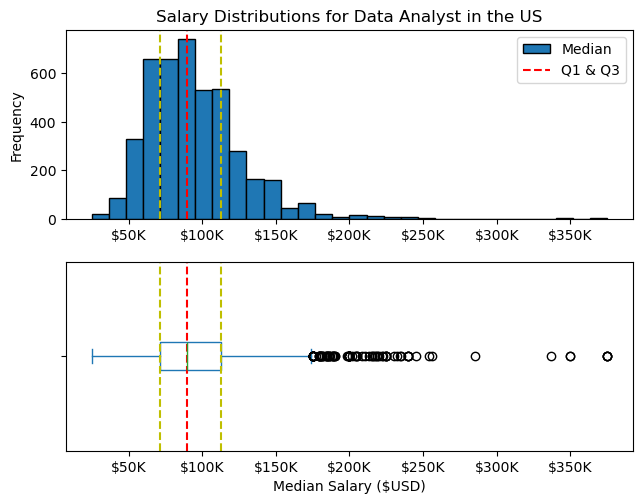

In [13]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:g}K'))

# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['Median', 'Q1 & Q3'])

df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:g}K'))

# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

## `LAST CELL`

C:\Users\go\AppData\Local\Temp\ipykernel_6216\2944085169.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


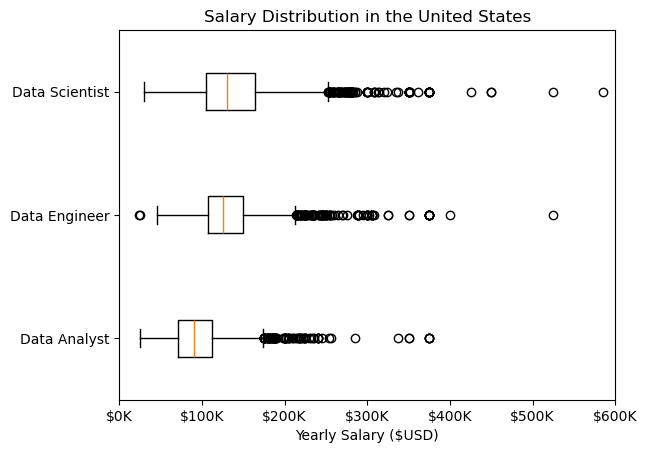

In [14]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

mask_titles = df['job_title_short'].isin(job_titles)   # True/False for rows matching job_titles
mask_country = df['job_country'] == 'United States'    # True/False for rows in the US
df_US = df[mask_titles & mask_country].copy()          # keep only rows matching both

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = []
labels = []

for job_title in job_titles:
    salaries = df_US[df_US['job_title_short'] == job_title]['salary_year_avg']
    if not salaries.empty:          # only add if there are salaries
        job_list.append(salaries)
        labels.append(job_title)    # keep the matching label


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca()  # get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()
